In [1]:
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:

# load up training and test data, combine into one dataFrame

# following are latest up to date
dfTrain = pd.read_csv( 'SporeTrainByTrialNewAdult.txt', sep='\t')
dfTest =  pd.read_csv( 'SporeTestByTrialNewAdult.txt', sep='\t')

df = pd.concat([dfTrain, dfTest], ignore_index=True, axis=0)
df.to_csv( 'sporeDataByTrialCombinedNewAdult.txt', sep='\t', index=False)

# define figure folder
imFolder =  'NewAdultSpore' # 'CtrBalancedImgs/' #../../../Papers/CogSci2016_Spore/Images/'  
if not os.path.exists(imFolder):
    os.mkdir(imFolder)


In [3]:
# # keep only cogsci data
# df.subid.unique()
# df = df[df.subid.apply( lambda x: int(x.strip('t'))) <= 20 ]
# df.subid.unique()

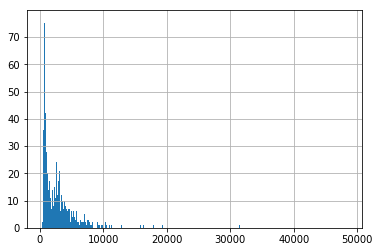

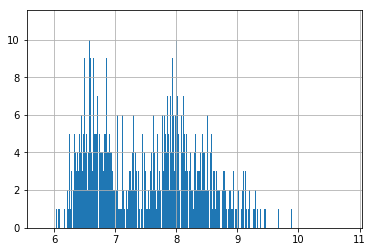

In [4]:
# show RT histograms (both standard and log transformed)
df.RTEstimate.hist(bins=1000)
figure()
df.logRT.hist(bins=1000)




In [5]:
print df.subid.unique()
print('%d participants'%( len(df.subid.unique())) ) 

print df.columns

['1' '10' '11' '12' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '4' '5' '6' '7' '8t' '9']
23 participants
Index([u'KEYPRESS', u'RESPONSE', u'RTEstimate', u'TRAIL_INDEX', u'auditory',
       u'block', u'cond', u'correct_response', u'logRT', u'subid',
       u'trgFirstFixRel', u'trgLatFix', u'trgLatRelFix', u'trgMDur',
       u'trgMpup', u'trgNFix', u'trgNSac', u'trgRelProp', u'trgSAmp',
       u'trialTime', u'trialtype', u'type', u'visual', u'warningBeepOn'],
      dtype='object')


In [6]:

# df.ix[df.subid== '5','acc']

In [7]:
# Get test
# add accuracy column.  Invert accuracy of participant 5, who inverted responding
test = df[df['type'] == 'Test']
test['acc'] = test.RESPONSE.apply( lambda(x): 1 if x=='Correct' else 0)
test.ix[test.subid== '5','acc'] = 1 - test.ix[test.subid== '5','acc']

# get test averages by participant and condition
testMean = test.groupby(['subid', 'trialtype','cond']).mean().reset_index()
testMean.columns

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index([u'subid', u'trialtype', u'cond', u'KEYPRESS', u'RTEstimate',
       u'TRAIL_INDEX', u'block', u'correct_response', u'logRT', u'trgLatFix',
       u'trgLatRelFix', u'trgMDur', u'trgMpup', u'trgNFix', u'trgNSac',
       u'trgRelProp', u'trgSAmp', u'trialTime', u'warningBeepOn', u'acc'],
      dtype='object')

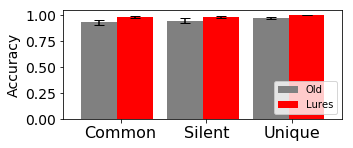

In [8]:
# Plot accuracy by condition (implied at test)
figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
tests =  ['Old','Lures']

colors = dict(zip(tests, ['gray','red']))
w = .5
xPos = 1
for c in conds:
    for t in tests:
        acc = testMean[(testMean.trialtype == c) &(testMean.cond==t)].acc
        bar(xPos, mean(acc), width=w, align='center', yerr=np.std(acc)/np.sqrt(len(acc)), 
            color=colors[t], label=t, ecolor='black', capsize=5  )
        xPos+=.5
    xPos+=.2
xlim([.5,4.4])
xticks([1.3,2.5,3.7], conds, fontsize=16)
ylabel('Accuracy', fontsize=14)
yticks(fontsize=14)
legend(tests, loc=4)





saveFile = imFolder + 'accuracy.png'
savefig(saveFile, bbox_inches='tight')

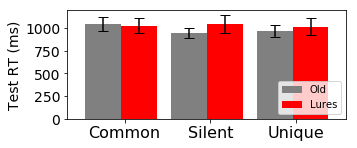

In [9]:
# Plot Rxn time by condition on Test, only accurate trials

testOnlyAcc = test[test.acc == 1]
testMeanAcc = testOnlyAcc.groupby(['subid', 'trialtype','cond']).mean().reset_index()

figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
tests =  ['Old','Lures']

colors = dict(zip(tests, ['gray','red']))
w = .5
xPos = 1
for c in conds:
    for t in tests:
        RTEstimate = testMeanAcc[(testMeanAcc.trialtype == c) &(testMeanAcc.cond==t)].RTEstimate
        bar(xPos, mean(RTEstimate), width=w, align='center', yerr=np.std(RTEstimate)/np.sqrt(len(RTEstimate)), 
            color=colors[t], label=t, ecolor='black', capsize=5  )
        xPos+=.5
    xPos+=.2
xlim([.5,4.4])
xticks([1.3,2.5,3.7], conds, fontsize=16)
ylabel('Test RT (ms)', fontsize=14)
yticks(fontsize=14)
legend(tests, loc=4)



saveFile = imFolder + 'testRxnTime.png'
savefig(saveFile, bbox_inches='tight')

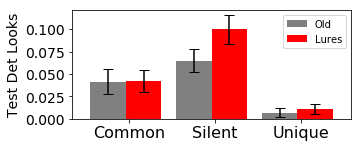

In [10]:
# Plot prop deterministic looking on Test
figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
tests =  ['Old','Lures']

colors = dict(zip(tests, ['gray','red']))
w = .5
xPos = 1
for c in conds:
    for t in tests:
        acc = testMean[(testMean.trialtype == c) &(testMean.cond==t)].trgRelProp
        bar(xPos, mean(acc), width=w, align='center', yerr=np.std(acc)/np.sqrt(len(acc)), 
            color=colors[t], label=t, ecolor='black', capsize=5  )
        xPos+=.5
    xPos+=.2
xlim([.5,4.4])
xticks([1.3,2.5,3.7], conds, fontsize=16)
ylabel('Test Det Looks', fontsize=14)
yticks(fontsize=14)
legend(tests, loc=1)


saveFile = imFolder + 'testDetLook.png'
savefig(saveFile, bbox_inches='tight')

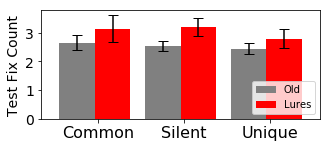

In [11]:
# Plot number fixations on Test
figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
tests =  ['Old','Lures']

colors = dict(zip(tests, ['gray','red']))
w = .5
xPos = 1
for c in conds:
    for t in tests:
        acc = testMean[(testMean.trialtype == c) &(testMean.cond==t)].trgNFix
        bar(xPos, mean(acc), width=w, align='center', yerr=np.std(acc)/np.sqrt(len(acc)), 
            color=colors[t], label=t, ecolor='black', capsize=5  )
        xPos+=.5
    xPos+=.2
xlim([.5,4.4])
xticks([1.3,2.5,3.7], conds, fontsize=16)
ylabel('Test Fix Count', fontsize=14)
yticks(fontsize=14)
legend(tests, loc=4)


saveFile = imFolder + 'testNFix.png'
savefig(saveFile, bbox_inches='tight')

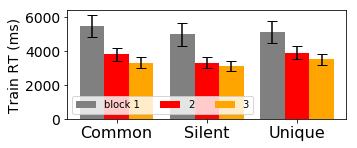

In [12]:
#show train study time (RT)

# get train averages by condition and block
train = df[df['type'] == 'Train']
trainMean = train.groupby(['subid', 'block', 'cond']).mean().reset_index()

figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
blocks =  [1,2,3]

colors = dict(zip(blocks, ['gray','red', 'orange']))
w = .3
xPos = 1
for c in conds:
    for b in blocks:
        RTEstimate = trainMean[(trainMean.cond == c) &(trainMean.block==b)].RTEstimate
        bar(xPos, mean(RTEstimate), width=w, align='center', yerr=np.std(RTEstimate)/np.sqrt(len(RTEstimate)), 
            color=colors[b], label=b, ecolor='black', capsize=5  )
        xPos+=.3
    xPos+=.2
xlim([.7,4.1])
xticks([1.3,2.4,3.5], conds, fontsize=16)
ylabel('Train RT (ms)', fontsize=14)
yticks(fontsize=14)
blocks[0] = 'block 1'
legend(blocks, loc=3, ncol=3, fontsize=10)



saveFile = imFolder + 'trainRxnTime.png'
savefig(saveFile, bbox_inches='tight')

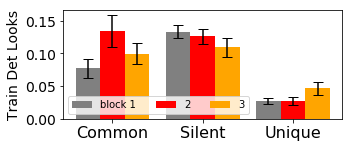

In [13]:
# show train prop det looking

figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
blocks =  [1,2,3]

colors = dict(zip(blocks, ['gray','red', 'orange']))
w = .3
xPos = 1
for c in conds:
    for b in blocks:
        RTEstimate = trainMean[(trainMean.cond == c) &(trainMean.block==b)].trgRelProp
        bar(xPos, mean(RTEstimate), width=w, align='center', yerr=np.std(RTEstimate)/np.sqrt(len(RTEstimate)), 
            color=colors[b], label=b, ecolor='black', capsize=5  )
        xPos+=.3
    xPos+=.2
xlim([.7,4.1])
xticks([1.3,2.4,3.5], conds, fontsize=16)
ylabel('Train Det Looks', fontsize=14)
yticks(fontsize=14)
blocks[0] = 'block 1'
legend(blocks, loc=3, ncol=3, fontsize=10)



saveFile = imFolder + 'trainDetLook.png'
savefig(saveFile, bbox_inches='tight')

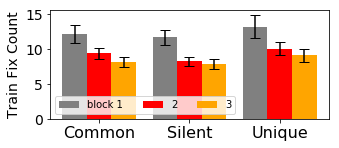

In [14]:
# show train prop det looking

figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
blocks =  [1,2,3]

colors = dict(zip(blocks, ['gray','red', 'orange']))
w = .3
xPos = 1
for c in conds:
    for b in blocks:
        RTEstimate = trainMean[(trainMean.cond == c) &(trainMean.block==b)].trgNFix
        bar(xPos, mean(RTEstimate), width=w, align='center', yerr=np.std(RTEstimate)/np.sqrt(len(RTEstimate)), 
            color=colors[b], label=b, ecolor='black', capsize=5  )
        xPos+=.3
    xPos+=.2
xlim([.7,4.1])
xticks([1.3,2.4,3.5], conds, fontsize=16)
ylabel('Train Fix Count', fontsize=14)
yticks(fontsize=14)
blocks[0] = 'block 1'
legend(blocks, loc=3, ncol=3, fontsize=10)



saveFile = imFolder + 'trainNFix.png'
savefig(saveFile, bbox_inches='tight')

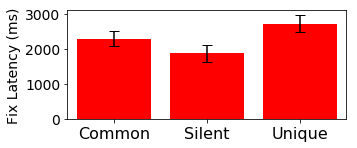

In [15]:
# get train averages by condition and block
train = df[df['type'] == 'Train']
trainMean = train.groupby(['subid', 'cond']).mean().reset_index()

figure(figsize=(5,2))

conds = ['Common', 'Silent','Unique']
blocks =  [1,2,3]
colors = dict(zip(blocks, ['gray','red', 'black']))
w = .8
xPos = 1
for c in conds:
#     for b in blocks:
    RTEstimate = trainMean[(trainMean.cond == c) ].trgLatRelFix
    bar(xPos, mean(RTEstimate), width=w, align='center', yerr=np.std(RTEstimate)/np.sqrt(len(RTEstimate)), 
        color='red', label=b, ecolor='black', capsize=5  )
    xPos+=1
#     xPos+=.2
xlim([.5,3.5])
xticks([1,2,3], conds, fontsize=16)
ylabel('Fix Latency (ms)', fontsize=14)
yticks(fontsize=14)
blocks[0] = 'block 1'
# legend(blocks, loc=3, ncol=3, fontsize=10)



saveFile = imFolder + 'latDetFix.png'
savefig(saveFile, bbox_inches='tight')

In [16]:
train.columns

Index([u'KEYPRESS', u'RESPONSE', u'RTEstimate', u'TRAIL_INDEX', u'auditory',
       u'block', u'cond', u'correct_response', u'logRT', u'subid',
       u'trgFirstFixRel', u'trgLatFix', u'trgLatRelFix', u'trgMDur',
       u'trgMpup', u'trgNFix', u'trgNSac', u'trgRelProp', u'trgSAmp',
       u'trialTime', u'trialtype', u'type', u'visual', u'warningBeepOn'],
      dtype='object')